In [2]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt


In [3]:
class GeneticAlgorithms:
    def geneticAlgorithm(problem, population, fitnessFunction, mutationProbability=0.01, iterations=10):
        iteration = 0
        while True:
            iteration += 1

            newPopulation = np.array([])
            for i in range(0, len(population)):
                x = GeneticAlgorithms.randomSelection(population, fitnessFunction)
                y = GeneticAlgorithms.randomSelection(population, fitnessFunction)

                child = problem.reproduce(x, y)
                if rnd.random() < mutationProbability:
                    child = GeneticAlgorithms.mutate(child)

                newPopulationLength = len(newPopulation)
                newPopulation = np.append(newPopulation, child)
                newPopulation = np.reshape(newPopulation, (newPopulationLength+1, len(child)))  # ! Reshape different

            population = newPopulation

            if iteration > iterations:
                break

        bestChild = GeneticAlgorithms.bestSelection(population, fitnessFunction)
        problem.printState(bestChild, 'Genetic Algorithm')
        # return bestChild

    def randomSelection(population, fitnessFunction):
        np.random.shuffle(population)  # Shuffle population

        chance = rnd.randint(0, np.sum([fitnessFunction(element) for element in population]))
        for element in population:
            chance -= fitnessFunction(element)
            if chance <= 0:
                return element

    def mutate(child):
        mutatedChild = child.copy()
        childLength = len(child)

        # Swap two random elements
        i = rnd.randint(0, childLength - 1)
        j = rnd.randint(0, childLength - 1)
        while i == j:
            j = rnd.randint(0, childLength - 1)

        mutatedChild[i], mutatedChild[j] = mutatedChild[j], mutatedChild[i]

        return mutatedChild

    def bestSelection(population, fitnessFunction):
        np.random.shuffle(population)  # Shuffle population

        return max(population, key=fitnessFunction)


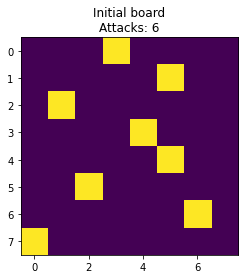

[[5 2 5 7 5 6 2 6]
 [7 1 8 6 6 8 4 8]
 [1 8 4 2 6 8 4 6]
 [3 8 1 3 7 8 7 7]
 [4 5 7 5 8 5 6 5]
 [5 7 3 8 3 4 2 3]
 [3 3 6 1 1 1 4 3]
 [4 5 2 2 7 2 1 2]
 [4 8 5 8 3 8 6 6]
 [5 7 6 4 4 5 4 8]
 [1 7 1 8 5 2 6 2]
 [8 4 5 5 2 6 7 1]
 [4 3 4 8 5 3 2 3]
 [2 1 2 3 8 4 8 5]
 [4 7 7 5 1 4 6 4]
 [5 3 7 3 8 7 3 4]
 [5 6 3 5 6 3 3 1]
 [8 1 2 2 5 3 1 2]
 [2 4 3 3 7 1 6 7]
 [5 4 7 6 2 1 2 7]
 [1 6 7 4 6 1 2 1]
 [8 2 8 8 2 4 1 1]
 [1 5 8 8 3 6 4 6]
 [3 6 7 4 8 8 3 1]
 [8 4 7 4 8 4 5 4]
 [2 2 1 1 7 5 1 2]
 [1 4 1 6 1 6 6 2]
 [2 1 6 7 5 4 5 3]
 [7 3 2 6 3 3 6 4]
 [5 3 7 5 4 7 6 7]
 [6 4 3 5 7 5 3 5]
 [5 2 2 6 7 7 2 2]
 [2 4 8 3 2 1 1 3]
 [2 5 3 4 8 5 7 5]
 [8 7 1 6 2 4 8 3]
 [4 8 8 5 5 4 8 4]
 [7 5 1 2 4 6 2 4]
 [1 8 2 4 4 1 1 6]
 [6 4 4 8 6 6 3 7]
 [8 3 1 4 8 4 6 3]
 [8 2 2 6 2 4 6 4]
 [8 3 6 6 4 1 6 1]
 [8 2 1 3 5 8 7 8]
 [6 4 6 7 3 7 1 6]
 [8 7 4 8 5 3 7 2]
 [7 6 6 3 6 5 8 2]
 [8 6 5 6 5 4 3 8]
 [4 6 3 1 2 6 3 6]
 [4 6 4 5 7 5 4 5]
 [3 3 8 1 1 7 1 6]]
[[1 5 8 8 3 6 4 6]
 [3 3 6 1 1 1 4 3]
 [8 4 7 4 8

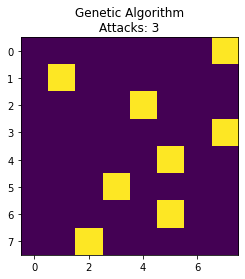

In [4]:
from NQueens import NQueens
nq = NQueens(8)
GeneticAlgorithms.geneticAlgorithm(nq, nq.population(), nq.fitnessFunction)


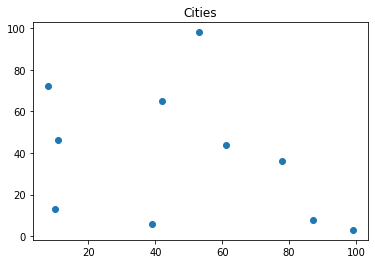

[[33 26 56 56 52 68 60 81  0 95 25 30 35 17 70 40 49 84 38 47]
 [24 52  8 14 38 18 99 97 31 41 85 93 81 61 23 46 33  7 60 49]]


ValueError: cannot reshape array of size 21 into shape (21,2)

In [5]:
from TravellingSalesman import TravellingSalesman
ts = TravellingSalesman(10)
GeneticAlgorithms.geneticAlgorithm(ts, ts.population(), ts.fitnessFunction)
